# Question 1

### Preprocess the data and split in training and test set in 70:30 ratio and make sure all classes are present in test data in approximately the same number. Visualize the training data with scatterplot, using all possible combinations of two attributes.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
import math
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [47]:
df = pd.read_csv("iris_data.csv")
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [48]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [50]:
values, counts = np.unique(df.iloc[:,-1], return_counts=True)
print(values)
print(counts)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[50 50 50]


In [51]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:,:-1], df.iloc[:,-1]
train_data, test_data = train_test_split(df, test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [53]:
def plotting_scatterplots(df):
    for i in range(len(df.columns.drop('class'))):
        for j in range(i+1, len(df.columns.drop('class'))):
            if i != j:
                plt.figure(figsize=(5,5))
                sns.scatterplot(x=df.columns[i], y=df.columns[j], data=df, hue='class')
                plt.show()

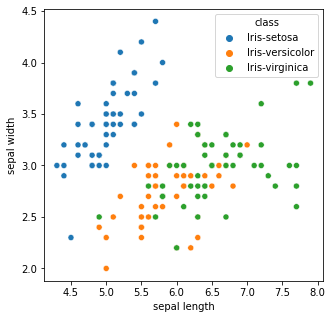

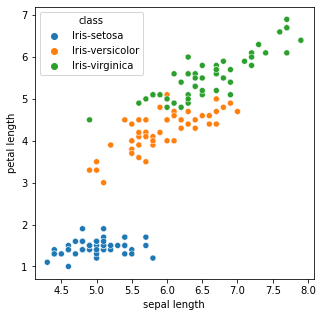

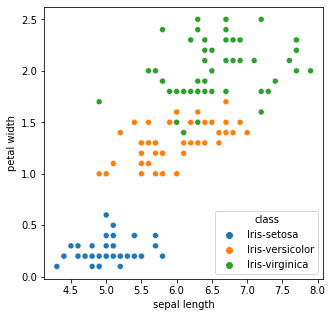

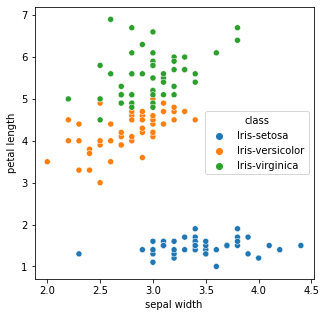

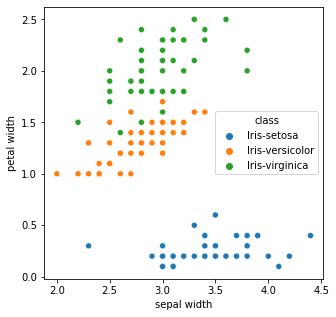

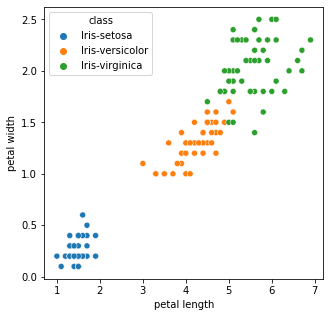

In [54]:
plotting_scatterplots(df)

In [55]:
print(X_train)

     sepal length  sepal width  petal length  petal width
81            5.5          2.4           3.7          1.0
133           6.3          2.8           5.1          1.5
137           6.4          3.1           5.5          1.8
75            6.6          3.0           4.4          1.4
109           7.2          3.6           6.1          2.5
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.1

[105 rows x 4 columns]


### Choose any three pairs of features (which you think will give good results), Train QDA models for each pair, for the classification task. You can use the QuadraticDiscriminantAnalysis function from sklearn. Report the mean and covariance of the distributions found from each QDA model.

In [56]:
pairs= [['sepal length','petal width'], ['petal length','petal width'], ['sepal width','petal width']]

X_train3 = X_train[pairs[0]].copy()
X_test3 = X_test[pairs[0]].copy()

X_train5 = X_train[pairs[1]].copy()
X_test5 = X_test[pairs[1]].copy()

X_train6 = X_train[pairs[2]].copy()
X_test6 = X_test[pairs[2]].copy()

qdaModel = QuadraticDiscriminantAnalysis(store_covariance=True)

qdaModel.fit(X_train3, y_train)
print("For the pair",pairs[0],"the mean is: ", qdaModel.means_)
print("For the pair",pairs[0],"the covariance is: ", qdaModel.covariance_)


qdaModel.fit(X_train5, y_train)
print("For the pair",pairs[1],"the mean is: ", qdaModel.means_)
print("For the pair",pairs[1],"the covariance is: ", qdaModel.covariance_)

qdaModel.fit(X_train6, y_train)
print("For the pair",pairs[2],"the mean is: ", qdaModel.means_)
print("For the pair",pairs[2],"the covariance is: ", qdaModel.covariance_)



For the pair ['sepal length', 'petal width'] the mean is:  [[4.96451613 0.24516129]
 [5.86216216 1.3027027 ]
 [6.55945946 2.00540541]]
For the pair ['sepal length', 'petal width'] the covariance is:  [array([[0.11569892, 0.00698925],
       [0.00698925, 0.01255914]]), array([[0.28297297, 0.05760511],
       [0.05760511, 0.04249249]]), array([[0.43414414, 0.04939189],
       [0.04939189, 0.0883033 ]])]
For the pair ['petal length', 'petal width'] the mean is:  [[1.46774194 0.24516129]
 [4.21081081 1.3027027 ]
 [5.54594595 2.00540541]]
For the pair ['petal length', 'petal width'] the covariance is:  [array([[0.03425806, 0.00817204],
       [0.00817204, 0.01255914]]), array([[0.24599099, 0.08385886],
       [0.08385886, 0.04249249]]), array([[0.29644144, 0.05224474],
       [0.05224474, 0.0883033 ]])]
For the pair ['sepal width', 'petal width'] the mean is:  [[3.36129032 0.24516129]
 [2.72432432 1.3027027 ]
 [2.98648649 2.00540541]]
For the pair ['sepal width', 'petal width'] the covarian

### Plot the decision boundary given by the QDA models on top of the corresponding scatterplot visualization of the data.

/home/ayushabrol/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/ayushabrol/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/ayushabrol/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


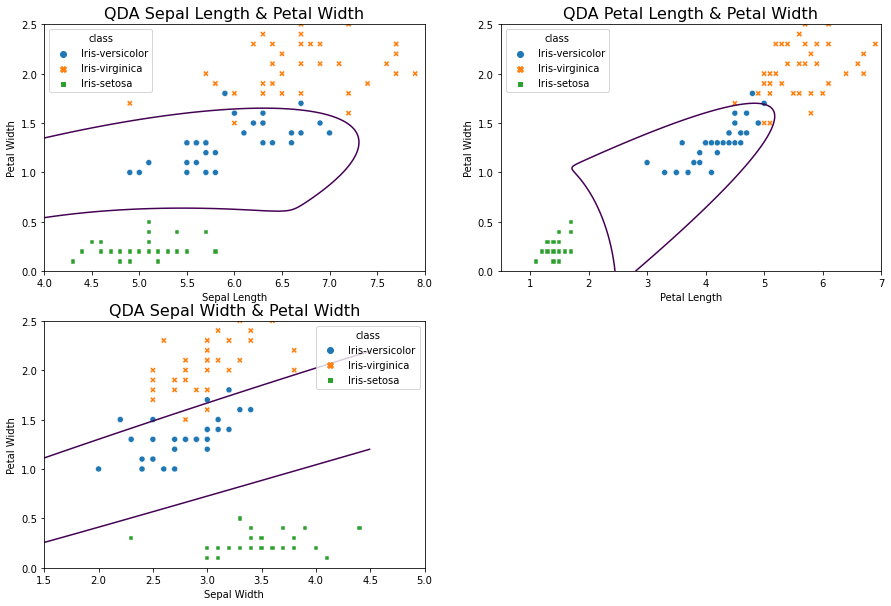

In [57]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)

sns.scatterplot(data=train_data, x='sepal length', y='petal width', hue="class", style='class')
qdaModel=QuadraticDiscriminantAnalysis()
qdaModel.fit(X_train3, y_train)
pred3 = qdaModel.predict(X_test3)

x_ax, y_ax = np.meshgrid(np.linspace(4, 8, 200), np.linspace(0, 2.5, 200))
X_grid = np.c_[x_ax.ravel(), y_ax.ravel()]
prob = qdaModel.predict_proba(X_grid)[:,1].reshape(x_ax.shape)
plt.contour(x_ax, y_ax, prob, [0.5])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.title("QDA Sepal Length & Petal Width", fontsize=16)

plt.subplot(2,2,2)
sns.scatterplot(data=train_data, x='petal length', y='petal width', hue="class", style='class')

qdaModel.fit(X_train5, y_train)
pred5 = qdaModel.predict(X_test5)

x_ax, y_ax = np.meshgrid(np.linspace(0.5, 7, 200), np.linspace(0, 2.5, 200))
X_grid = np.c_[x_ax.ravel(), y_ax.ravel()]
prob = qdaModel.predict_proba(X_grid)[:,1].reshape(x_ax.shape)
plt.contour(x_ax, y_ax, prob, [0.5])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("QDA Petal Length & Petal Width", fontsize=16)

plt.subplot(2,2,3)
sns.scatterplot(data=train_data, x='sepal width', y='petal width', hue="class", style='class')

qdaModel.fit(X_train6, y_train)
pred6 = qdaModel.predict(X_test6)

x_ax, y_ax = np.meshgrid(np.linspace(1.5,4.5, 200), np.linspace(0, 2.5, 200))
X_grid = np.c_[x_ax.ravel(), y_ax.ravel()]
prob = qdaModel.predict_proba(X_grid)[:,1].reshape(x_ax.shape)
plt.contour(x_ax, y_ax, prob, [0.5])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.title("QDA Sepal Width & Petal Width", fontsize=16)
plt.xlim(1.5,5)

plt.show()

### Predict the test data and report error rate for each case.

In [58]:
def error_rate(pred, actual):
    return np.mean(pred != actual)


In [59]:
print("Error rate when qda model is trained with sepal length and petal width features :",error_rate(pred3, y_test))
print("Error rate when qda model is trained with petal length and petal width features :",error_rate(pred5, y_test))
print("Error rate when qda model is trained with sepal width and petal width features :",error_rate(pred6, y_test))

Error rate when qda model is trained with sepal length and petal width features : 0.0
Error rate when qda model is trained with petal length and petal width features : 0.0
Error rate when qda model is trained with sepal width and petal width features : 0.022222222222222223


In [60]:
print("Either of ",pairs[0],"or",pairs[1],"are giving the best results because of the least error rates.")

Either of  ['sepal length', 'petal width'] or ['petal length', 'petal width'] are giving the best results because of the least error rates.


### Take the pair of features that has given the best result and train LDA model with same training data. You can use the LinearDiscriminantAnalysis function from sklearn. Plot the decision boundary given by the LDA model on top of the scatterplot visualization of the data.

/home/ayushabrol/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


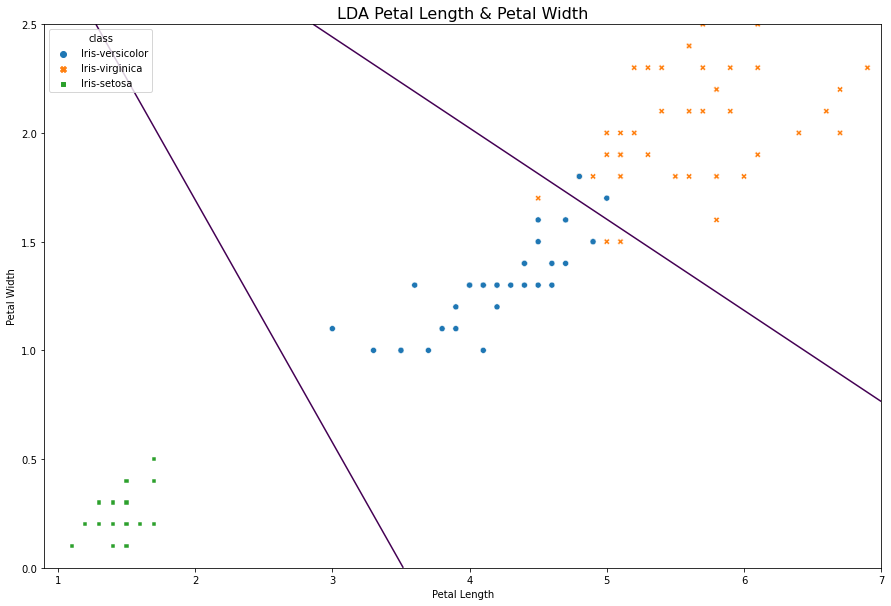

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldaModel = LinearDiscriminantAnalysis(store_covariance=True)

ldaModel.fit(X_train5, y_train)
pred_lda = ldaModel.predict(X_test5)

plt.figure(figsize=(15,10))
sns.scatterplot(data=train_data, x='petal length', y='petal width', hue="class", style='class')

x_ax, y_ax = np.meshgrid(np.linspace(0.9,7, 200), np.linspace(0, 2.5, 200))
X_grid = np.c_[x_ax.ravel(), y_ax.ravel()]
prob = ldaModel.predict_proba(X_grid)[:,1].reshape(x_ax.shape)
plt.contour(x_ax, y_ax, prob, [0.5])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("LDA Petal Length & Petal Width", fontsize=16)
plt.show()

### Report the error rate on the test data for LDA model.

In [62]:
print("Error rate when LDA model is trained with", pairs[1],"as features :",error_rate(pred_lda, y_test))

Error rate when LDA model is trained with ['petal length', 'petal width'] as features : 0.0


In [63]:
import matplotlib as mpl    

def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180 * angle / np.pi # convert to degrees
    ell = mpl.patches.Ellipse(mean, 4 * v[0] ** 0.5, 4 * v[1] ** 0.5,
                                            180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.plot(mean[0],mean[1],"*",color="yellow",markersize=15)

### Visualize the gaussian distributions obtained from QDA and LDA.

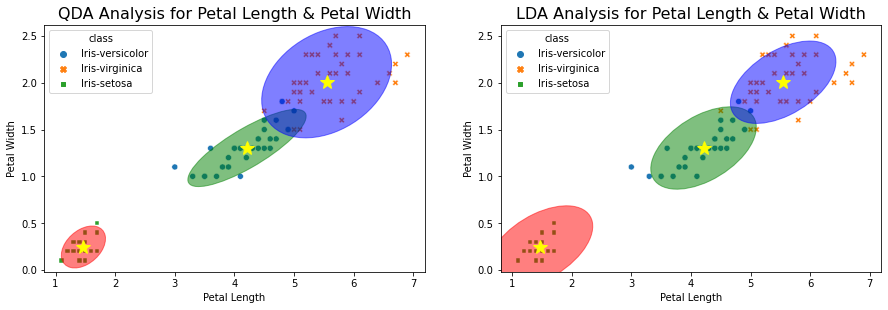

In [64]:
qda_new = QuadraticDiscriminantAnalysis(store_covariance=True)
lda_new = LinearDiscriminantAnalysis(store_covariance=True)
qda_new.fit(X_train5, y_train)
lda_new.fit(X_train5, y_train)

plt.figure(figsize=(15,10))
newplt = plt.subplot(2,2,1)
sns.scatterplot(data=train_data, x='petal length', y='petal width', hue="class", style='class')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("QDA Analysis for Petal Length & Petal Width", fontsize=16)
plot_ellipse(newplt, qda_new.means_[0], qda_new.covariance_[0], 'red')
plot_ellipse(newplt, qda_new.means_[1], qda_new.covariance_[1], 'green')
plot_ellipse(newplt, qda_new.means_[2], qda_new.covariance_[2], 'blue')

newplt2 = plt.subplot(2,2,2)
sns.scatterplot(data=train_data, x='petal length', y='petal width', hue="class", style='class')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("LDA Analysis for Petal Length & Petal Width", fontsize=16)
plot_ellipse(newplt2, lda_new.means_[0], lda_new.covariance_, 'red')
plot_ellipse(newplt2, lda_new.means_[1], lda_new.covariance_, 'green')
plot_ellipse(newplt2, lda_new.means_[2], lda_new.covariance_, 'blue')

plt.show()

# Question 2

### From the data, find out the sample mean and sample covariance matrix of each class and visualize the gaussian distribution using the obtained sample mean and sample covariance matrix.

In [65]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [66]:
df2 = df[['petal length', 'petal width','class']]
df2

,petal length,petal width,class
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [67]:
values = np.unique(df2['class'])
print(values)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [68]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df2['class'] = encoder.fit_transform(df2['class'])
df2

/tmp/ipykernel_34438/551895448.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['class'] = encoder.fit_transform(df2['class'])


,petal length,petal width,class
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [69]:
def get_mean(data):
    return sum(data)/len(data)

In [70]:
def covariance(data,cls):
    matrix = []
    mean_x = get_mean(data[data['class']==cls]['petal length'])
    mean_y = get_mean(data[data['class']==cls]['petal width'])
    cov_xy1 = sum((data[data['class']==cls]['petal length']-mean_x)**2)/len(data[data['class']==cls]['petal length'])
    cov_xy2 = sum((data[data['class']==cls]['petal length']-mean_x)*(data[data['class']==cls]['petal width']-mean_y))/len(data[data['class']==cls]['petal length'])
    cov_xy3 = sum((abs(data[data['class']==cls]['petal width']-mean_x))*(data[data['class']==cls]['petal length']-mean_y))/len(data[data['class']==cls]['petal length'])
    cov_xy4 = sum((data[data['class']==cls]['petal width']-mean_y)**2)/len(data[data['class']==cls]['petal width'])
    matrix = [[cov_xy1, cov_xy2],[cov_xy3, cov_xy4]]
    return matrix


In [71]:
cls1 = df2[df2['class'] == 0]
cls2 = df2[df2['class'] == 1]
cls3 = df2[df2['class'] == 2]

In [72]:
print("Mean of class Iris-setosa :",[get_mean(cls1['petal length']),get_mean(cls1['petal width'])])
print("Covariance of class Iris-setosa :",covariance(cls1,0))

print("Mean of class Iris-versicolor :",[get_mean(cls2['petal length']),get_mean(cls2['petal width'])])
print("Covariance of class Iris-versicolor :",covariance(cls2,1))

print("Mean of class Iris-virginica :",[get_mean(cls3['petal length']),get_mean(cls3['petal width'])])
print("Covariance of class Iris-virginica :",covariance(cls3,2))


Mean of class Iris-setosa : [1.464, 0.2439999999999999]
Covariance of class Iris-setosa : [[0.02950400000000001, 0.005584], [1.4828160000000006, 0.011263999999999996]]
Mean of class Iris-versicolor : [4.26, 1.3259999999999998]
Covariance of class Iris-versicolor : [[0.21640000000000012, 0.07164], [8.536716000000002, 0.03832399999999998]]
Mean of class Iris-virginica : [5.552, 2.026]
Covariance of class Iris-virginica : [[0.2984960000000002, 0.04784800000000001], [12.384828000000002, 0.07392399999999999]]


In [73]:
def plot_ellipse_2(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180 * angle / np.pi # convert to degrees
    ell = mpl.patches.Ellipse(mean, 4 * v[0] ** 0.5, 4 * v[1] ** 0.5,
                                            180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.plot(mean[0],mean[1],"*",color="yellow",markersize=15)

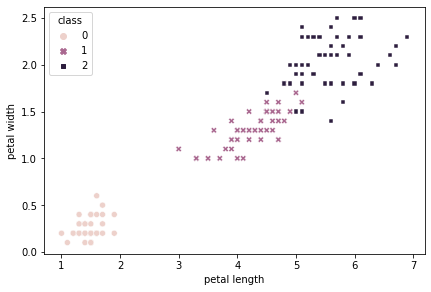

In [74]:
plt.figure(figsize=(15,10))
newplt = plt.subplot(2,2,1)
sns.scatterplot(data=df2, x='petal length', y='petal width', hue="class", style='class')

mean1 = [get_mean(cls1['petal length']),get_mean(cls1['petal width'])]
cov1 = covariance(cls1,0)
#plot_ellipse_2(newplt, mean1, cov1, 'red')

mean2 = [get_mean(cls2['petal length']),get_mean(cls2['petal width'])]
cov2 = covariance(cls2,1)
#plot_ellipse_2(newplt, mean2, cov2, 'green')

mean3 = [get_mean(cls3['petal length']),get_mean(cls3['petal width'])]
cov3 = covariance(cls3,2)
#plot_ellipse_2(newplt, mean3, cov3, 'blue')

plt.show()

In [75]:
from sklearn.model_selection import train_test_split
df2

,petal length,petal width,class
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [76]:
X = df2
y = df2['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 3) (45, 3) (105,) (45,)


### Write a function compute_likelihood to compute the likelihood of data given the parameters mean and covariance matrix assuming gaussian distribution.

In [77]:
def compute_likelihood(df, parameters, target):
    new_df = df.copy()
    new_df.drop(target, axis=1, inplace=True)
    probability = 1
    for i in range(len(df)):
        row = new_df[i:i+1]
        x = np.cross((row - parameters[0]), np.linalg.inv(parameters[1]))
        y = np.array(np.transpose(row-parameters[0]))
        cr_product = x[0]*y[0][0] + x[1]*y[1][0]
        probability *= np.exp(-1/2*cr_product)/np.sqrt(2*np.pi*np.linalg.det(parameters[1]))

    return probability

In [78]:
def get_probab(dataset,cov_matrix,mean,cls):
  Matrix=[]
  for rows in dataset.iterrows():
    x=np.array([rows[1][0],rows[1][1]])
    comp_1=np.subtract(x,mean)
    trans_comp_1=comp_1.transpose()
    COV=np.linalg.inv(cov_matrix)
    result=comp_1 @ COV @ trans_comp_1
    det=(np.linalg.det(cov_matrix))**0.5
    final=(1/3)*(1/(2*3.14*det))*np.exp(((-1/2)*result))
    Matrix.append(final)
  return Matrix

### Write a function to perform maximum likelihood estimation over the training dataset to determine mean and covariance and classify it using Bayes classifier. Report the parameters obtained for each class.

In [79]:
def max_likelihood_est(df, feature, target):
    unq_class = list(df[target].unique())
    unq_class.sort()
    means = []
    cov = []
    for i in unq_class:
        x = df.loc[df[target]==i]
        n = len(x)
        means.append([get_mean(list(x[feature[0]])), get_mean(list(x[feature[1]]))])
        co1 = covariance(list(x[feature[0]]), list(x[feature[0]]))*(n-1)/n
        co2 = covariance(list(x[feature[1]]), list(x[feature[0]]))*(n-1)/n
        co3 = covariance(list(x[feature[1]]), list(x[feature[1]]))*(n-1)/n
        cov.append([[co1, co2],[co2,co3]])

    
    return means, cov

In [80]:
def Prior_Prob(y, value):          
    return len(y[y==value])/len(y)

In [81]:
def get_MLE(dataset,cls):
  mean=[mean(dataset,'petal length',cls),mean(dataset,'petal width',cls)]
  variance=np.var(dataset[['petal length','petal width']].values,axis=0)
  var=np.multiply(variance,[[1,0],[0,1]])
  return (mean,var)